In [7]:
import pandas as pd
from urllib.parse import urlparse
import numpy as np
import nltk.data
from requests_html import HTMLSession

def parse_elements(url,element):
    session = HTMLSession()
    r = session.get(url)
    elements = r.html.find(element)
    return [element.text for element in elements]

url = 'https://www.utoronto.ca/about-u-of-t/quick-facts'
paragraphs = parse_elements(url, 'p')
links = parse_elements(url, 'a')

In [8]:
df = pd.DataFrame(paragraphs, columns=['Text'])

In [9]:
df

,Text
0,The University of Toronto is a global leader i...
1,The University of Toronto has three campuses: ...
2,"U of T has 16,775 new full-time students enter..."
3,"* First Entry programs include Arts & Science,..."
4,The top five countries/regions of origin are C...
5,"16,503"
6,Faculty
7,"8,087"
8,Staff members
9,163


In [14]:
import requests
from bs4 import BeautifulSoup

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find elements containing text data
text_elements = soup.find_all('div', class_='field field--name-field-add-text field--type-string-long field--label-hidden field__item')

# Find elements containing integer data
integer_elements = soup.find_all('div', class_='field field--name-field-add-number field--type-integer field--label-hidden field__item')

# Extract and print text data
for text_element in text_elements:
    text_data = text_element.text
    print(text_data)

# Extract and print integer data
for integer_element in integer_elements:
    integer_data = integer_element.text
    print(integer_data)


St. George
Mississauga
Scarborough
Domestic
International
Total
Graduate
Undergraduate
Total
Country/region
Students
China
India
United States
Korea (South)
Hong Kong
Taiwan
Iran
Türkiye
Indonesia
Japan
Pakistan
Country/region
Alumni
Canada
United States
China
Hong Kong
United Kingdom
Australia
Great Britain
India
Singapore
Japan
South Korea
 
Times Higher Education 2023
ShanghaiRanking Academic Ranking of World Universities 2023
QS World University Rankings 2024
U.S. News Best Global Universities 2022-23
NTU Ranking (formerly HEEACT) 2023
University of Toronto
20,335
903
379
16,252
5,365
21,617
46,905
15,199
13,957
52,993
23,068
76,061
67,240
16,102
14,336
69,245
28,433
97,678
15,717
2,405
1,189
890
655
501
422
320
305
276
274
614,656
27,274
6,075
5,747
2,011
1,227
1,224
1,213
980
903
839
18
24
21
18
5


In [11]:
import pandas as pd
# manually recreate categories since they were not actually well-defined in the original web
graduate_data = [
    "St. George", "Mississauga", "Scarborough", "Domestic", "International", "Total",
    20335, 903, 379, 16252, 5365, 21617
]

undergraduate_data = [
    "St. George", "Mississauga", "Scarborough", "Domestic", "International", "Total",
    46905, 15199, 13957, 52993, 23068, 76061
]

country_region_data = [
    "China", "India", "United States", "Korea (South)", "Hong Kong", "Taiwan", "Iran", 
    "Türkiye", "Indonesia", "Japan", "Pakistan",
    15717, 2405, 1189, 890, 655, 501, 422, 320, 305, 276, 274
]

alumni_data = [
    "Canada", "United States", "China", "Hong Kong", "United Kingdom", "Australia", 
    "Great Britain", "India", "Singapore", "Japan", "South Korea",
    614656, 27274, 6075, 5747, 2011, 1227, 1224, 1213, 980, 903, 839
]

In [12]:
df1 = pd.DataFrame({
    "Campus": graduate_data[:6],
    "Graduates": graduate_data[6:]
})

# Display the DataFrame as a table
print(df1)

          Campus  Graduates
0     St. George      20335
1    Mississauga        903
2    Scarborough        379
3       Domestic      16252
4  International       5365
5          Total      21617


In [13]:
df2 = pd.DataFrame({
    "Campus": undergraduate_data[:6],
    "Undergraduates": undergraduate_data[6:]
})

# Display the DataFrame as a table
print(df2)

          Campus  Undergraduates
0     St. George           46905
1    Mississauga           15199
2    Scarborough           13957
3       Domestic           52993
4  International           23068
5          Total           76061


In [14]:
df3 = pd.DataFrame({
    "Country/region": country_region_data[:11],
    "Students": country_region_data[11:]
})

print(df3)

   Country/region  Students
0           China     15717
1           India      2405
2   United States      1189
3   Korea (South)       890
4       Hong Kong       655
5          Taiwan       501
6            Iran       422
7         Türkiye       320
8       Indonesia       305
9           Japan       276
10       Pakistan       274


In [15]:
df4 = pd.DataFrame({
    "Country/region": alumni_data[:11],
    "Alumnis": alumni_data[11:]
})

print(df4)

    Country/region  Alumnis
0           Canada   614656
1    United States    27274
2            China     6075
3        Hong Kong     5747
4   United Kingdom     2011
5        Australia     1227
6    Great Britain     1224
7            India     1213
8        Singapore      980
9            Japan      903
10     South Korea      839


In [19]:
pd.options.display.max_colwidth = None

df.head(10)

,Text
0,"The University of Toronto is a global leader in research and teaching and has a significant footprint, both in Canada and around the world."
1,"The University of Toronto has three campuses: St. George (downtown Toronto), Mississauga (west of Toronto) and Scarborough (east of Toronto). For more information please see our U of T campuses page."
2,"U of T has 16,775 new full-time students entering our First Entry* undergraduate programs in fall 2022-23:"
3,"* First Entry programs include Arts & Science, Applied Science & Engineering, Architecture, Kinesiology & Physical Education, Music and Transitional Year Program."
4,"The top five countries/regions of origin are China, India, United States, South Korea and Hong Kong."
5,"16,503"
6,Faculty
7,"8,087"
8,Staff members
9,163


In [20]:
df.iloc[10:20]

,Text
10,Librarians
11,For more information please see Research & Innovation.
12,"The University of Toronto has over 679,671 alumni around the world as of Fall 2023."
13,"Trying to articulate a university's standing in the world is inevitably a subjective exercise. International rankings provide one independent measure of how U of T compares to other universities. As these rankings make clear, we stand among the best public universities in the world and are recognized as Canada's top university."
14,Programs
15,"As of fall 2022, the University of Toronto offers over 700 undergraduate programs in Humanities & Social Sciences, Life Sciences, Physical & Mathematical Sciences, Commerce & Management, Computer Science, Engineering, Kinesiology & Physical Education, Music and Architecture."
16,Please see Undergraduate Programs for more details.
17,Tuition
18,Domestic
19,"Tuition cost for first-entry domestic undergraduate students for 2022-23 ranges from approximately $5,700 to $16,370* depending on the program."


In [21]:
df.iloc[21:30]

,Text
21,"Tuition cost for international undergraduate students in first-entry programs for 2022-23 ranges from approximately $39,560 to $62,250* depending on the program."
22,Programs
23,Please see Graduate Programs for more details.
24,Tuition
25,Domestic
26,"The University of Toronto is committed to the financial support of graduate students in doctoral stream programs. For many doctoral stream students, programs commit to minimum level of funding at the beginning of each year, for up to five years of study. Partial funding may be available to graduate students in other programs."
27,International
28,* Tuition fees reported here do not include compulsory non-academic incidental fees.
29,"** Starting in the fall of 2018, most international PhD students at the University of Toronto pay tuition fees equivalent to those of domestic students."


In [22]:
df.iloc[31:40]

,Text
31,"The University of Toronto has more than 1,200 student clubs, organizations and activities across all three campuses."
32,"The University of Toronto at St. George has 11 residences: eight residences belonging to one of our seven colleges, Chestnut Residence, Graduate House, and Student Family Housing."
33,"The Mississauga campus can accommodate 1,357* students in residence in 2022-23."
34,"The University of Toronto has a housing guarantee for students entering their first year. Residence is guaranteed for all new full-time students entering their first year of university in an undergraduate program for the first time, provided that they have indicated their interest in residence by completing the University’s common residence application by March 31, and have received and accepted an offer of admission by June 2."
35,For more information please see Housing Services or Clubs & Organizations.
36,The University of Toronto has 42 libraries. The University of Toronto library system has more than:
37,12 million volumes in 341 languages
38,"1,500,000 electronic resources in various formats"
39,"28,000 linear metres of archival material and"


In [24]:
df.iloc[40:54]

,Text
40,500 terabytes of data
41,"The University of Toronto library system is Canada’s largest research library system, and the third largest in North America."
42,For more information please see Library Directory.
43,The University of Toronto’s operating budget for 2023-24 is $3.36 billion.
44,For more information please see Budget Reports.
45,"University of Toronto entrepreneurs have secured more than $2.5 billion in investment and created 600+ venture-backed companies, along with 9,000+ jobs over the past decade."
46,"University of Toronto is a leader for research-based start-ups, inventions, licenses, and options (AUTM)."
47,"University of Toronto Entrepreneurship ranks among the top university-managed business incubators in the world. (UBI World Rankings, 2021-22)"
48,"University of Toronto Entrepreneurship offers an Intellectual Property Education Program, which is available to all students, staff, and faculty."
49,For more information please see Facts and Figures.


In [25]:
points = parse_elements(url, 'li')

In [26]:
points

['Email',
 'Quercus',
 'Acorn',
 'News & Media',
 'About U of T',
 'Give to U of T',
 'Academics',
 'Programs of study',
 'Research & innovation',
 'University life',
 'Libraries',
 'A to Z directory',
 'News & Media',
 'About U of T',
 'Give to U of T',
 'Academics',
 'Programs of study',
 'Research & innovation',
 'University life',
 'Libraries',
 'A to Z directory',
 'Future students',
 'Current students',
 'Alumni',
 'Faculty and Staff',
 'Donors',
 'Visitors',
 'Email',
 'Quercus',
 'Acorn',
 'Future students',
 'Current students',
 'Alumni',
 'Faculty and Staff',
 'Donors',
 'Visitors',
 'News & Media',
 'About U of T',
 'Give to U of T',
 'Academics',
 'Programs of study',
 'Research & innovation',
 'University life',
 'Libraries',
 'A to Z directory',
 'News & Media',
 'About U of T',
 'Give to U of T',
 'Academics',
 'Programs of study',
 'Research & innovation',
 'University life',
 'Libraries',
 'A to Z directory',
 'About U of T',
 'Mission',
 'Quick facts',
 'Reports and a

In [35]:
import requests
from bs4 import BeautifulSoup

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Remove unwanted elements (script, style, comments, etc.)
for element in soup(['script', 'style', 'comment']):
    element.extract()

# Extract the visible text
text = soup.get_text(separator=' ')

# Print the extracted text
print(text)


 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Quick facts | University of Toronto 
 
 
 
 
 
 
 
      Skip to main content
     
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Main menu tools 
 
 
 Email 
 
 
 Quercus 
 
 
 Acorn 
 
 
 
 
 
 
   
 Campus status 
 
 
 
 
 
 
 
 
 
 
 
 
 Search the U of T website 
 
 
 
  Search 
 
 
 
 
 
 
 Jump to menu 
 
 Jump to... 
 
 
 
 
 
 
 News & Media 
 
 
 About U of T 
 
 
 Give to U of T 
 
 
 Academics 
 
 
 Programs of study 
 
 
 Research & innovation 
 
 
 University life 
 
 
 Libraries 
 
 
 A to Z directory 
 
 
 
 
 
 
 
 News & Media 
 
 
 About U of T 
 
 
 Give to U of T 
 
 
 Academics 
 
 
 Programs of study 
 
 
 Research & innovation 
 
 
 University life 
 
 
 Libraries 
 
 
 A to Z directory 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Search the U of T website 
 
 
 
  Search 
 
 
 
 
 
 
 
 
 Main navigation 
 
 
 Future students 
 
 
 Current students 
 
 
 Alumni 
 
 
 Faculty and Staff 
 
 
 Donors 
 
 
 Visitors 
 
 
 
 
 
 
 
 Main menu too

In [36]:
links = parse_elements(url, 'a')

In [37]:
links

['Skip to main content',
 '',
 'Email',
 'Quercus',
 'Acorn',
 'Campus status',
 'News & Media',
 'About U of T',
 'Give to U of T',
 'Academics',
 'Programs of study',
 'Research & innovation',
 'University life',
 'Libraries',
 'A to Z directory',
 'News & Media',
 'About U of T',
 'Give to U of T',
 'Academics',
 'Programs of study',
 'Research & innovation',
 'University life',
 'Libraries',
 'A to Z directory',
 '',
 'Future students',
 'Current students',
 'Alumni',
 'Faculty and Staff',
 'Donors',
 'Visitors',
 'Email',
 'Quercus',
 'Acorn',
 'Campus status',
 'Future students',
 'Current students',
 'Alumni',
 'Faculty and Staff',
 'Donors',
 'Visitors',
 'News & Media',
 'About U of T',
 'Give to U of T',
 'Academics',
 'Programs of study',
 'Research & innovation',
 'University life',
 'Libraries',
 'A to Z directory',
 'News & Media',
 'About U of T',
 'Give to U of T',
 'Academics',
 'Programs of study',
 'Research & innovation',
 'University life',
 'Libraries',
 'A to Z d

In [43]:
def parse_href(url, element):
    session = HTMLSession()
    r = session.get(url)
    elements = r.html.find(element)
    links = [element.attrs['href'] for element in elements if 'href' in element.attrs]
    return links

In [45]:
# Assuming you have a BeautifulSoup object 'soup' and you want to find all links
links = soup.find_all('a')

# Create a set to store unique 'href' attributes
links_set = set()

# Iterate through the links and add their 'href' attributes to the set
for link in links:
    href = link.get('href')  # Use get method to safely retrieve the 'href' attribute
    if href:
        links_set.add(href)

# Check the number of unique links
len(links_set)


55

In [46]:
df.iloc[1:54]

,Text
1,"The University of Toronto has three campuses: St. George (downtown Toronto), Mississauga (west of Toronto) and Scarborough (east of Toronto). For more information please see our U of T campuses page."
2,"U of T has 16,775 new full-time students entering our First Entry* undergraduate programs in fall 2022-23:"
3,"* First Entry programs include Arts & Science, Applied Science & Engineering, Architecture, Kinesiology & Physical Education, Music and Transitional Year Program."
4,"The top five countries/regions of origin are China, India, United States, South Korea and Hong Kong."
5,"16,503"
6,Faculty
7,"8,087"
8,Staff members
9,163
10,Librarians


In [54]:
student_pop = pd.merge(df1, df2, on="Campus", how="left")
student_pop

,Campus,Graduates,Undergraduates
0,St. George,20335,46905
1,Mississauga,903,15199
2,Scarborough,379,13957
3,Domestic,16252,52993
4,International,5365,23068
5,Total,21617,76061


In [56]:
student_origin = pd.merge(df3, df4, on="Country/region", how="outer")
student_origin

,Country/region,Students,Alumnis
0,China,15717.0,6075.0
1,India,2405.0,1213.0
2,United States,1189.0,27274.0
3,Korea (South),890.0,NaN
4,Hong Kong,655.0,5747.0
5,Taiwan,501.0,NaN
6,Iran,422.0,NaN
7,Türkiye,320.0,NaN
8,Indonesia,305.0,NaN
9,Japan,276.0,903.0


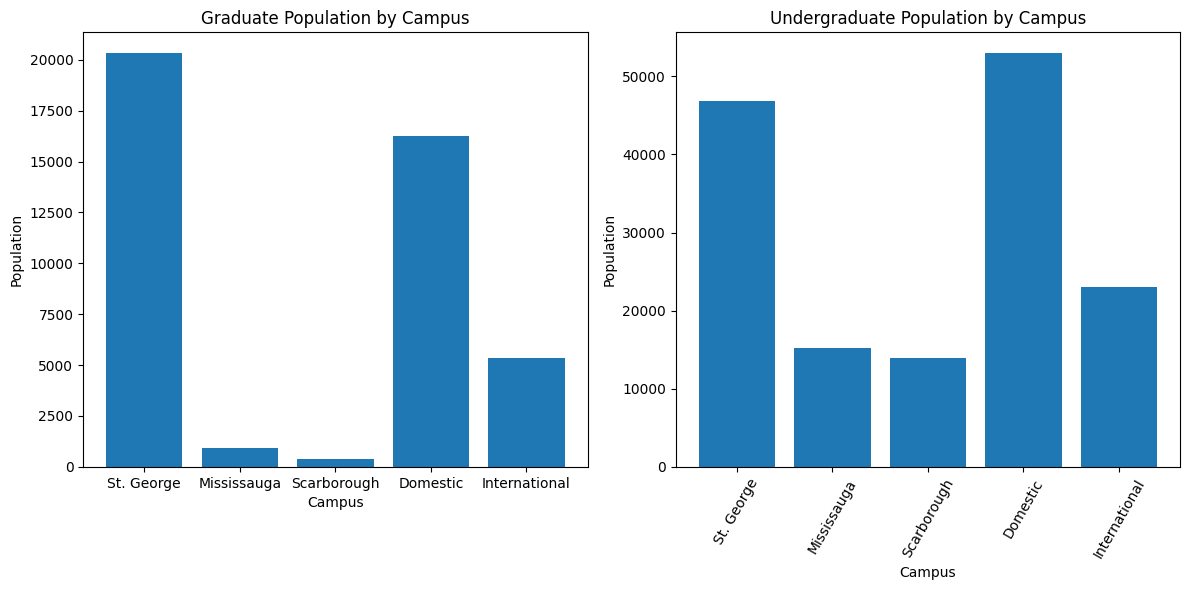

In [61]:
# student_pop

import matplotlib.pyplot as plt

graduates_data = student_pop[student_pop['Campus'] != 'Total'][['Campus', 'Graduates']]
undergraduates_data = student_pop[student_pop['Campus'] != 'Total'][['Campus', 'Undergraduates']]

# Create subplots for graduate and undergraduate populations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for graduates
ax1.bar(graduates_data['Campus'], graduates_data['Graduates'])
ax1.set_title('Graduate Population by Campus')
ax1.set_xlabel('Campus')
ax1.set_ylabel('Population')

# Bar plot for undergraduates
ax2.bar(undergraduates_data['Campus'], undergraduates_data['Undergraduates'])
ax2.set_title('Undergraduate Population by Campus')
ax2.set_xlabel('Campus')
ax2.set_ylabel('Population')

plt.xticks(rotation=60)

# Display the plots
plt.tight_layout()
plt.show()

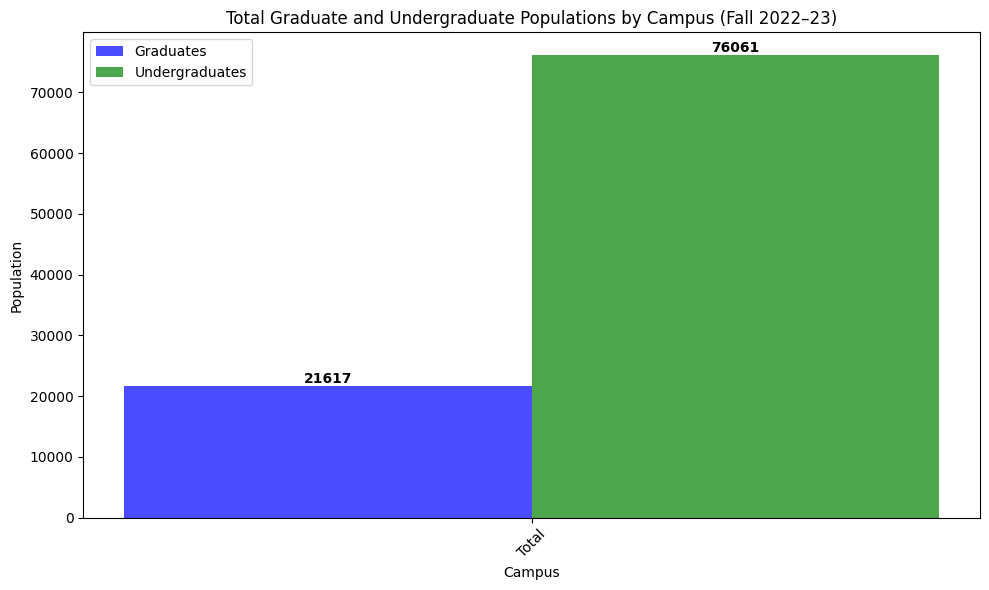

In [69]:
total_data = student_pop[student_pop['Campus'] == 'Total']

# Create a bar chart for both graduates and undergraduates
plt.figure(figsize=(10, 6))

# Bar plot for graduates
plt.bar(total_data['Campus'], total_data['Graduates'], label='Graduates', alpha=0.7)

# Bar plot for undergraduates
plt.bar(total_data['Campus'], total_data['Undergraduates'], label='Undergraduates', alpha=0.7)

plt.xlabel('Campus')
plt.ylabel('Population')
plt.title('Total Graduate and Undergraduate Population by Campus')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


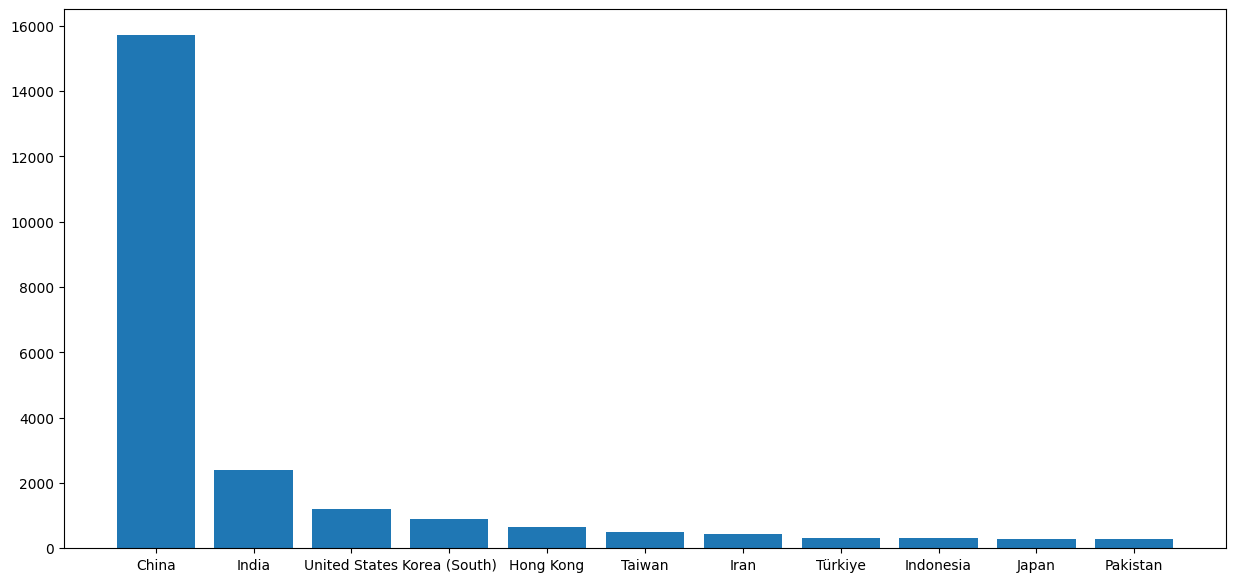

In [79]:
origin = student_origin['Country/region'].head(15)
students = student_origin['Students'].head(15)

# wider for long country names
fig = plt.figure(figsize =(15, 7))

plt.bar(origin[0:15], students[0:15])

plt.show()

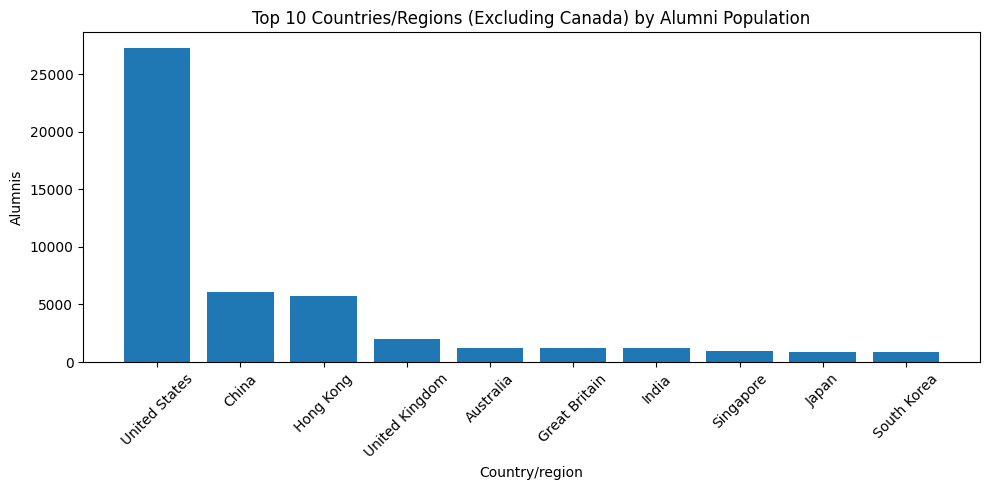

In [91]:

filtered_student_origin = student_origin[student_origin['Country/region'] != 'Canada']
sorted_student_origin = filtered_student_origin.sort_values(by='Alumnis', ascending=False).head(10)

# Extract the 'Country/region' and 'Alumnis' columns
origin = sorted_student_origin['Country/region']
alum = sorted_student_origin['Alumnis']

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 5))
bars = plt.bar(origin, alum)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Country/region')
plt.ylabel('Alumnis')
plt.title('Top 10 Countries/Regions (Excluding Canada) by Alumni Population')


# Show the plot
plt.tight_layout()
plt.show()


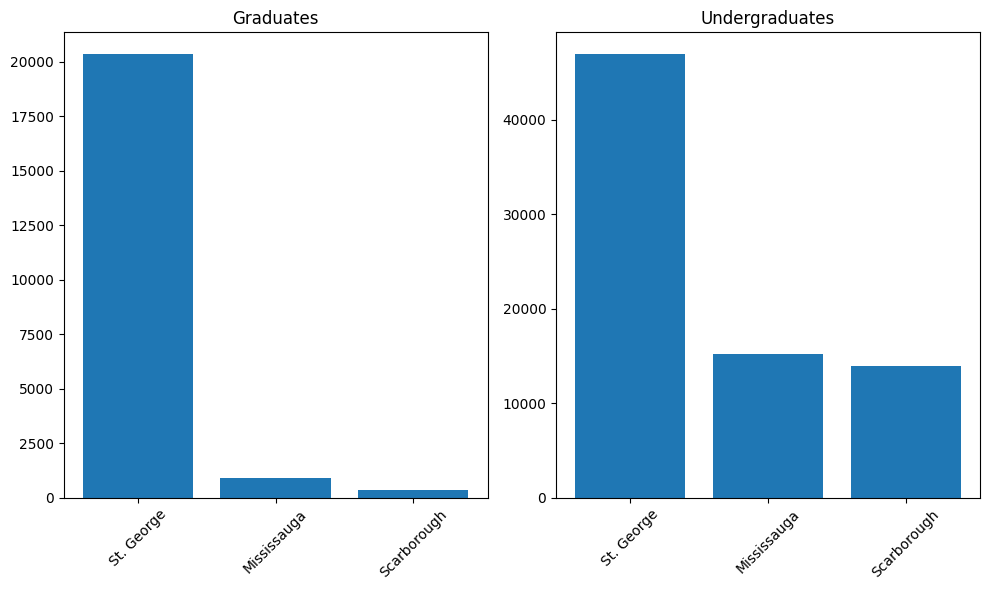

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'student_pop'
# Filter out rows for campuses only
campuses_only = student_pop.loc[student_pop['Campus'].isin(['St. George', 'Mississauga', 'Scarborough'])]

# Create bar plots for Graduates and Undergraduates
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Bar plot for Graduates
plt.subplot(1, 2, 1)
plt.bar(campuses_only['Campus'], campuses_only['Graduates'])
plt.title('Graduates')
plt.xticks(rotation=45)

# Bar plot for Undergraduates
plt.subplot(1, 2, 2)
plt.bar(campuses_only['Campus'], campuses_only['Undergraduates'])
plt.title('Undergraduates')
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


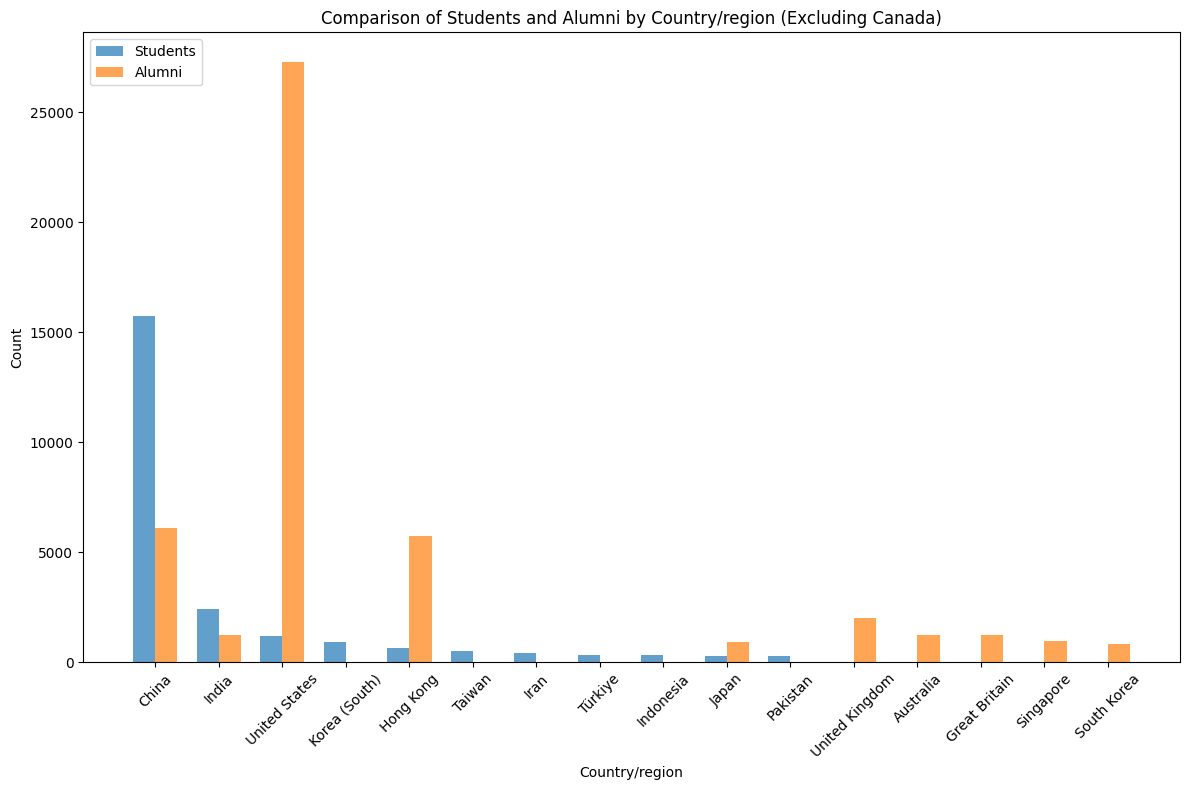

In [100]:
plt.figure(figsize=(12, 8))

filtered_origin = student_origin[student_origin['Country/region'] != 'Canada']

countries = filtered_origin['Country/region']
students = filtered_origin['Students']
alumni = filtered_origin['Alumnis']

bar_width = 0.35
index = np.arange(len(countries))

plt.bar(index, students, bar_width, label='Students', alpha=0.7)
plt.bar(index + bar_width, alumni, bar_width, label='Alumni', alpha=0.7)

plt.xlabel('Country/region')
plt.ylabel('Count')
plt.title('Comparison of Students and Alumni by Country/region (Excluding Canada)')
plt.xticks(index + bar_width / 2, countries, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [116]:
pattern = r'\d+'

df['Contains Number'] = df['Text'].str.contains(pattern)

count_with_number = df['Contains Number'].sum()

print("DataFrame df texts that contain a number:", count_with_number)
print("Length of the DataFrame:", len(df))

DataFrame df texts that contain a number: 22
Length of the DataFrame: 54


In [119]:
# List of elements containing "Campus"
campus_elements = [element for element in points if "Campus" in element]

# Print the filtered elements
for campus_element in campus_elements:
    print(campus_element)


9,244 at our St. George Campus
3,644 at our Scarborough Campus
3,321 at our Mississauga Campus
Campus maps
Campus safety


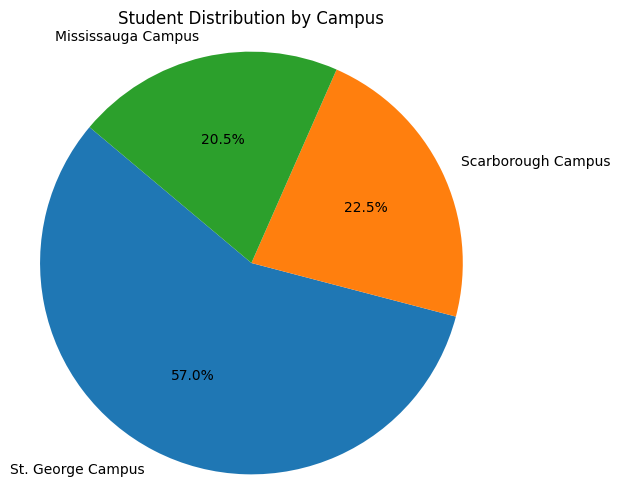

In [120]:


# Data
labels = ['St. George Campus', 'Scarborough Campus', 'Mississauga Campus']
sizes = [9244, 3644, 3321]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Student Distribution by Campus')

# Show the pie chart
plt.show()
